**Data Dictionary**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

**Product** - The model no. of the treadmill
Age -  Age of the customer in no of years
Gender - Gender of the customer.

**Education** - Education of the customer in no. of years.

**Marital Status** - Marital status of the customer.

**Usage** - Avg. # times the customer wants to use the treadmill every week.

**Fitness** - Self rated fitness score of the customer (5 - very fit, 1 - very unfit).

**Income** - Income of the customer.

**Miles**- Miles that a customer expects to run

In [6]:
#importing the packages necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
#loading the data set for analysis
cardio = pd.read_csv('/content/drive/MyDrive/CardioGoodFitness.csv')


To understand the data,View the first 5 rows of the data set 

In [8]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


View the number of rows and columns

In [9]:
cardio.shape

(180, 9)

Exploring some statistical features of the data set

In [10]:
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0




*   **Age**: The business serves a wide range of customers from young to middle aged(18-50yr old) with the average customer age approximately 29 years. 25% of these customers fall below the mean age
*  **Education:** 75% of the customers are distributed above the average education level suggesting a substantial number  of literate customers.
*   **Usage**: the distribution of the treadmill usage is almost the same across majority of the customers (25% percentile=3 ,50% percentile =3 ,75% percentile =4), however the maximum utility time is 7 suggesting a possible presence of outliers here.
*   **Income**: There is a huge difference between the max income and 75th% percentile income also evidenced in the high standard deviation, this needs to be investigated for outliers. The lowest income earned by a customer is 29,562
*   **Miles:**The average miles run by a customer is around 103miles 
and this mileage is clustered around 50% and 75% of the sample size. There is also a huge gap between the max mile and 75% percentile which requires further investigation for outliers.








Check the variables and their properties

In [11]:
#use the info() to view data types
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The data contains 3 string object(categorical) variables and and 6 interger (numeric) variables

In [12]:
#to check for the total count of missing values and associated variables
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The data set has no missing value

In [13]:
#check for duplicate
cardio.duplicated().sum()

0

In order to approach the business question, we can group the customers by the products they subscribe to and analyse customers' profiles per product. We start by visualising the different product categories available.

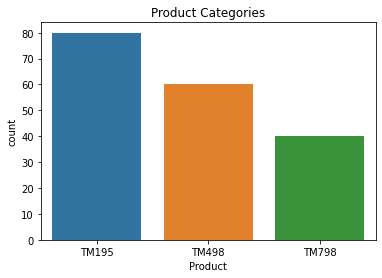

In [14]:
#use countplot to  show distribution of different products
sns.countplot(data = cardio, x = 'Product')
plt.title('Product Categories');

The company has 3 products(TM195,TM498,TM798) with customers patronizing TM195 most while TM798 has the least patronization.

In [15]:
#creating dataframes for the different product categories to aid objective anaysis
TM195 = cardio[cardio['Product'] == 'TM195']
TM498 = cardio[cardio['Product'] == 'TM498']
TM798 = cardio[cardio['Product'] == 'TM798']

We then run some sanity checks on the data grouped by product category to confirm accuracy and integrity

In [16]:
#using shape function to see the number of customers for each and match against total number of customers
print('Product TM195 has',TM195.shape[0], 'customers')
print('Product TM498 has',TM498.shape[0], 'customers')
print('Product TM798 has',TM798.shape[0], 'customers')
print('Total number of customers is',cardio.shape[0])

Product TM195 has 80 customers
Product TM498 has 60 customers
Product TM798 has 40 customers
Total number of customers is 180


In [17]:
#Generating the statistical distributions/ customer profile for TM195 product
TM195.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


In [18]:
#Generating the statistical distributions/ customer profile for TM498 product
TM498.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


In [19]:
##Generating the statistical distributions/ customer profile for TM798 product
TM798.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0





* **AGE:**The age profile of the customers for TMI95 is between 18yrs-50yrs old, TM498 is 19yrs-48yrs old while TM798 shows 22yrs-48yrs old. There is however, huge difference between the 75 percentile and maximum age value for all products suggesting presence of outliers, this is also evidenced in the high standard deviation in the variable.
* **EDUCATION:** Customers using TM798 appears to be the most educated and they are seen to have 75th percentile on education level 18 with a max of 21, this is higher than their peers in TM498 and TM195

*   **USAGE**: Average usage times per week is also higher among TM798 customers when compared to other product customers
*  **FITNESS**: Fitness score is higher in TM798 customers with minimum value of 3 




*   **INCOME**: The average customer income is lowest in TM195 customers while this is highest is TM798 customers. However, a high standard deviation and gap between 75th percentile and maximum value indicates outliers that need to be investigated further
*   **MILES:**There is possible presence of outliers in all customer data as there is a huge gap between the 75th percentile and maximum value for all products 





# Univariate analysis

---



Performing Univariate analysis on categorical variables 

**Observing Gender**


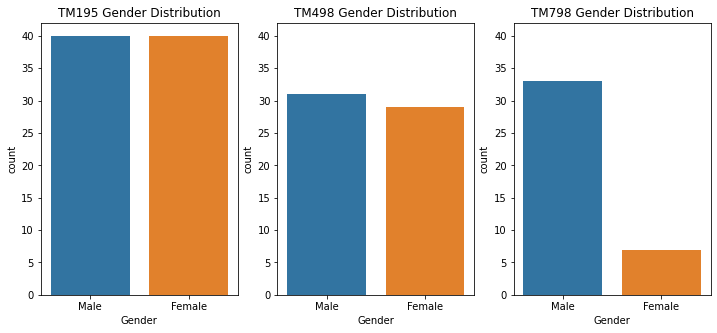

In [20]:
#use the subplot function to display all products in the same line for better visual comparison
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Use the countplot() function to create a countplot for each subplot
sns.countplot(x='Gender', data=TM195, ax=axs[0])
sns.countplot(x='Gender', data=TM498, ax=axs[1])
sns.countplot(x='Gender', data=TM798, ax=axs[2])
# Get the maximum y value across all subplots for uniform scaling

y_max = max([ax.get_ylim()[1] for ax in axs])

# Set the y-axis limits for all subplots to be the same
for ax in axs:
    ax.set_ylim(0, y_max)

# Add a title to each subplot
axs[0].set_title("TM195 Gender Distribution")
axs[1].set_title("TM498 Gender Distribution")
axs[2].set_title("TM798 Gender Distribution");



*   The gender is evenly distributed in the sales for TM195 suggesting this might be a unisex product
*   TM498 uptake by male is slightly higher than that of female

*   There is a high significant purchase gap between male and female for TM798. This product seems to be less attractive to the female. 






**Observing Marital Status**

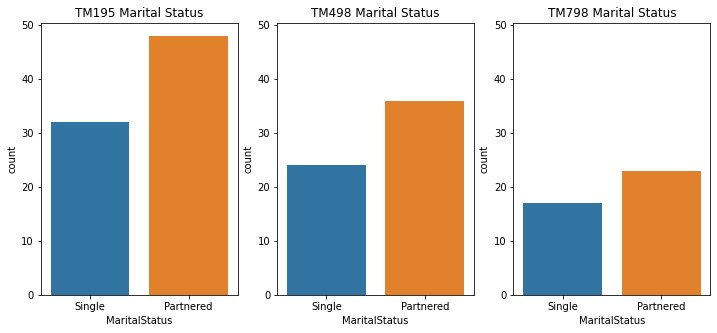

In [21]:
#use the subplot function to display all products in the same line for better visual comparison
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Use the countplot() function to create a countplot for each subplot
sns.countplot(x='MaritalStatus', data=TM195, ax=axs[0])
sns.countplot(x='MaritalStatus', data=TM498, ax=axs[1])
sns.countplot(x='MaritalStatus', data=TM798, ax=axs[2])
# Get the maximum y value across all subplots for uniform scaling

y_max = max([ax.get_ylim()[1] for ax in axs])

# Set the y-axis limits for all subplots to be the same
for ax in axs:
    ax.set_ylim(0, y_max)

# Add a title to each subplot
axs[0].set_title("TM195 Marital Status")
axs[1].set_title("TM498 Marital Status")
axs[2].set_title("TM798 Marital Status");

Customers with status as partnered shows higher patronage across all products

Performing univariate analysis on numerical variables

**Observing age**

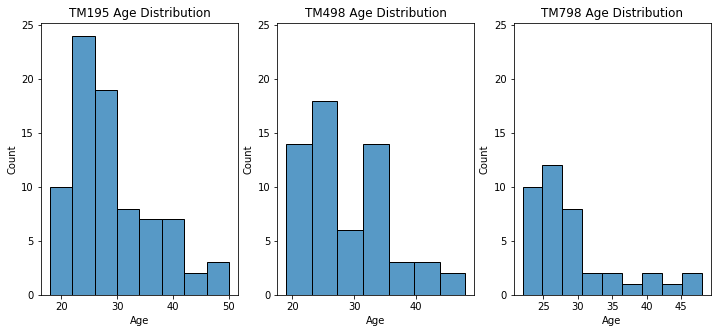

In [22]:
#use the subplot function to display all products in the same line for better visual comparison
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Use the histplot() function to create a histogram for each subplot
sns.histplot(x='Age', data=TM195, ax=axs[0])
sns.histplot(x='Age', data=TM498, ax=axs[1])
sns.histplot(x='Age', data=TM798, ax=axs[2])
# Get the maximum y value across all subplots for uniform scaling

y_max = max([ax.get_ylim()[1] for ax in axs])



# Set the y-axis limits for all subplots to be the same
for ax in axs:
    ax.set_ylim(0, y_max)
   

# Add a title to each subplot
axs[0].set_title("TM195 Age Distribution")
axs[1].set_title("TM498 Age Distribution")
axs[2].set_title("TM798 Age Distribution");

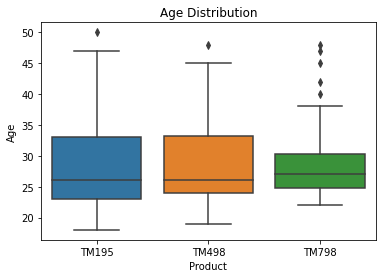

In [21]:
sns.boxplot(data = cardio, x = 'Product', y = 'Age')
plt.title('Age Distribution');



*   The median age for TM798 customers is slightly higher than that of the other two products
*   Outliers exists in all product data however this is more significant among TM798 customers


*   From the boxplot,Customers of TM798 are predominantly younger when compared to the other two products 
*   The age variable is right skewed with the degree of skewness higher in TM798





**Observing Education**

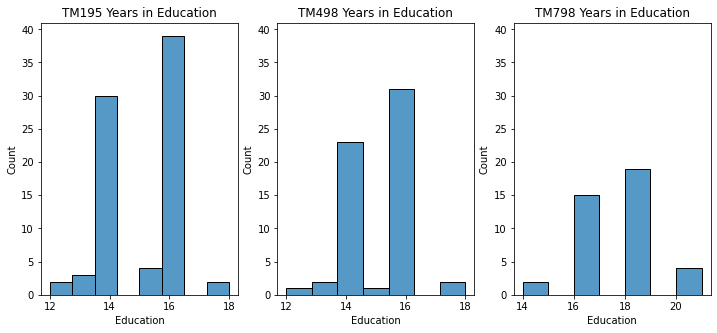

In [23]:
#use the subplot function to display all products in the same line for better visual comparison
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Use the histplot() function to create a histogram for each subplot
sns.histplot(x='Education', data=TM195, ax=axs[0])
sns.histplot(x='Education', data=TM498, ax=axs[1])
sns.histplot(x='Education', data=TM798, ax=axs[2])
# Get the maximum y value across all subplots for uniform scaling

y_max = max([ax.get_ylim()[1] for ax in axs])



# Set the y-axis limits for all subplots to be the same
for ax in axs:
    ax.set_ylim(0, y_max)
   

# Add a title to each subplot
axs[0].set_title("TM195 Years in Education")
axs[1].set_title("TM498 Years in Education")
axs[2].set_title("TM798 Years in Education");

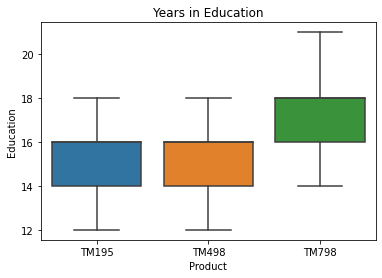

In [24]:
#boxplot to compare education level among product users
sns.boxplot(data = cardio, x = 'Product', y = 'Education');
plt.title('Years in Education');



*   TM498 and TM195 product users appears to have the same distribution pattern for years of education. However, more customers in TM195 has spent up to 16 years  in education  possibly due to its larger share of customers
*   TM798 users has the highest number of years in education with 14years as the minimum and 21years as maximum.



**Observing Usage**

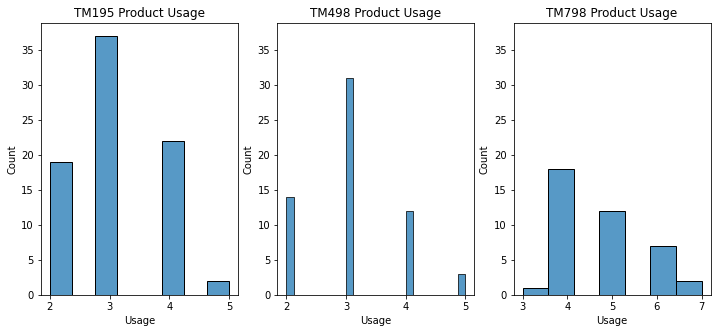

In [25]:
#use the subplot function to display all products in the same line for better visual comparison
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Use the histplot() function to create a histogram for each subplot
sns.histplot(x='Usage', data=TM195, ax=axs[0])
sns.histplot(x='Usage', data=TM498, ax=axs[1])
sns.histplot(x='Usage', data=TM798, ax=axs[2])
# Get the maximum y value across all subplots for uniform scaling

y_max = max([ax.get_ylim()[1] for ax in axs])



# Set the y-axis limits for all subplots to be the same
for ax in axs:
    ax.set_ylim(0, y_max)
   

# Add a title to each subplot
axs[0].set_title("TM195 Product Usage")
axs[1].set_title("TM498 Product Usage")
axs[2].set_title("TM798 Product Usage");

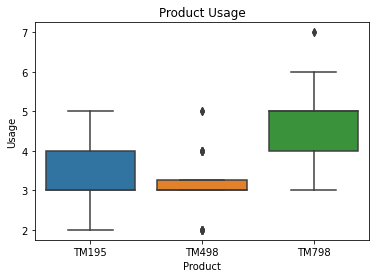

In [26]:
#boxplot to compare usage among product users
sns.boxplot(data = cardio, x = 'Product', y = 'Usage');
plt.title('Product Usage');



*   Outliers observed for TM498 and TM798
*   Average utilization of the products per week is shown to be highest in TM798


**Observing Fitness**

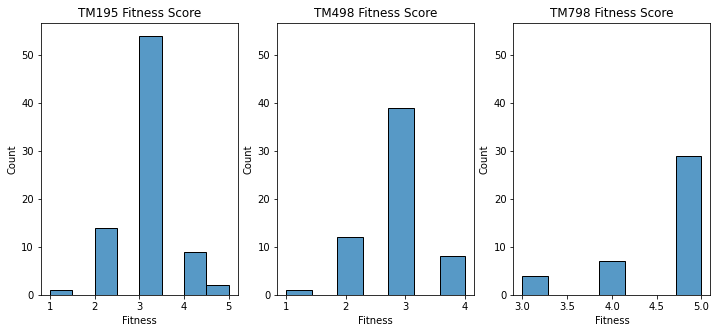

In [27]:
#use the subplot function to display all products in the same line for better visual comparison
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Use the histplot() function to create a histogram for each subplot
sns.histplot(x='Fitness', data=TM195, ax=axs[0])
sns.histplot(x='Fitness', data=TM498, ax=axs[1])
sns.histplot(x='Fitness', data=TM798, ax=axs[2])
# Get the maximum y value across all subplots for uniform scaling

y_max = max([ax.get_ylim()[1] for ax in axs])



# Set the y-axis limits for all subplots to be the same
for ax in axs:
    ax.set_ylim(0, y_max)
   

# Add a title to each subplot
axs[0].set_title("TM195 Fitness Score")
axs[1].set_title("TM498 Fitness Score")
axs[2].set_title("TM798 Fitness Score");

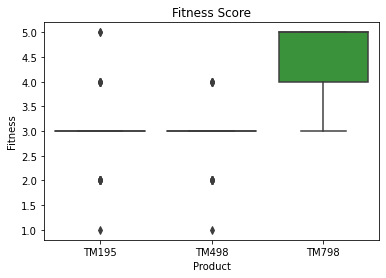

In [28]:
#boxplot to compare Fitness score among product users
sns.boxplot(data = cardio, x = 'Product', y = 'Fitness')
plt.title('Fitness Score');

* Outliers exist for TM195 and TM498
* Majority of customers using TM195 and TM498 are on fitness score 3 while for TM798, modal fitness score is above 4

**Observing Income**


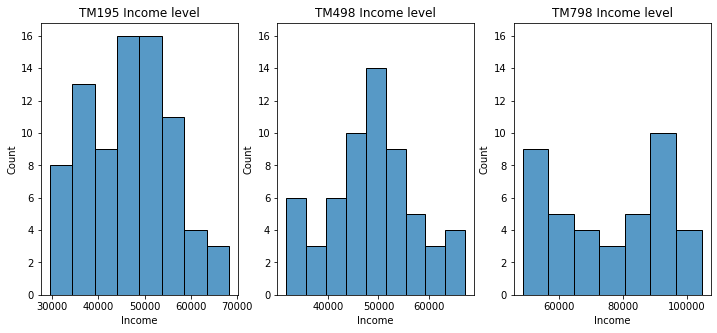

In [29]:
#use the subplot function to display all products in the same line for better visual comparison
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Use the histplot() function to create a histogram for each subplot
sns.histplot(x='Income', data=TM195, ax=axs[0])
sns.histplot(x='Income', data=TM498, ax=axs[1])
sns.histplot(x='Income', data=TM798, ax=axs[2])
# Get the maximum y value across all subplots for uniform scaling

y_max = max([ax.get_ylim()[1] for ax in axs])



# Set the y-axis limits for all subplots to be the same
for ax in axs:
    ax.set_ylim(0, y_max)
   

# Add a title to each subplot
axs[0].set_title("TM195 Income level")
axs[1].set_title("TM498 Income level")
axs[2].set_title("TM798 Income level");

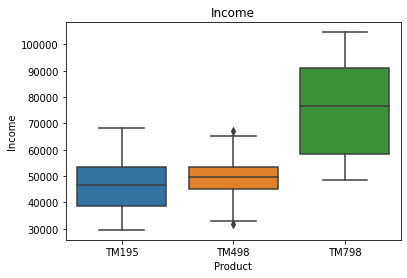

In [31]:
#boxplot to compare Income distribution among product users
sns.boxplot(data = cardio, x = 'Product', y = 'Income')
plt.title('Income');



*   TM798 subscribers are high income earners with median mark of about 76,000
*   The lowest income earners can be found among TM195 customers
* There is presence of outliers in TM498



**Observing Miles**

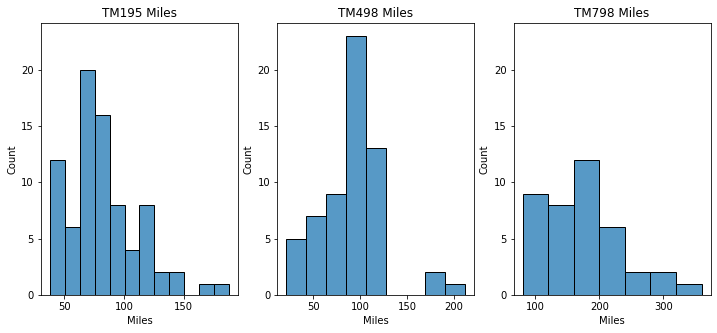

In [33]:
#use the subplot function to display all products in the same line for better visual comparison
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Use the histplot() function to create a histogram for each subplot
sns.histplot(x='Miles', data=TM195, ax=axs[0])
sns.histplot(x='Miles', data=TM498, ax=axs[1])
sns.histplot(x='Miles', data=TM798, ax=axs[2])
# Get the maximum y value across all subplots for uniform scaling

y_max = max([ax.get_ylim()[1] for ax in axs])



# Set the y-axis limits for all subplots to be the same
for ax in axs:
    ax.set_ylim(0, y_max)
   

# Add a title to each subplot
axs[0].set_title("TM195 Miles")
axs[1].set_title("TM498 Miles")
axs[2].set_title("TM798 Miles");

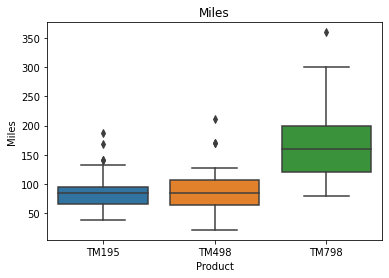

In [34]:
#boxplot to compare Miles among product users
sns.boxplot(data = cardio, x = 'Product', y = 'Miles')
plt.title('Miles');

* All products has few outliers
* Expected mileage is highest in TM798 with the highest median mark observed.


## BIVARIATE ANALYSIS

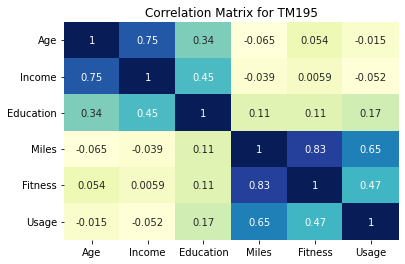

In [35]:
#To view correlation among attributes in TM195 category using heatmap
sns.heatmap(data = TM195[['Age','Income','Education','Miles','Fitness','Usage']].corr(), cbar = False, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Matrix for TM195');




*   A strong positive correlation exists between the following pairs:
* - age and income
* - Miles and usage
* - Miles and Fitness



*   Education has weak correlation with other variables except income where it shows some level of correlation.
*  Miles and usage are negatively correlated with Age and Income 





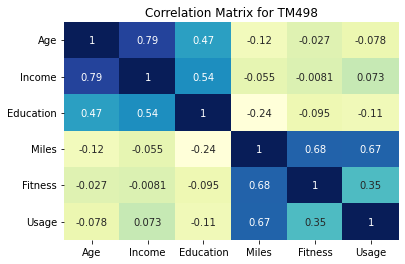

In [36]:
#To view correlation among attributes in TM498 category using heatmap
sns.heatmap(data = TM498[['Age','Income','Education','Miles','Fitness','Usage']].corr(), cbar = False, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Matrix for TM498');

* A strong positive correlation exists between the following pairs:
age and income,
Miles and usage,
Miles and Fitness,
Education and income


*  Education negatively correlates with Usage, Fitness and Miles 
*  Age has negative correlation with Usage, Fitness and Miles
* Fitness and income has a negative correlation



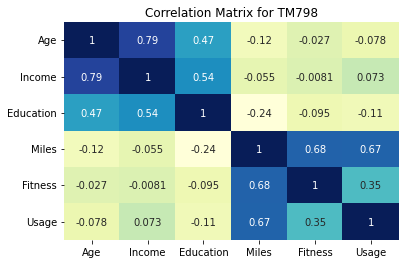

In [5]:
#To view correlation among attributes in TM798 category using heatmap
sns.heatmap(data = TM498[['Age','Income','Education','Miles','Fitness','Usage']].corr(), cbar = False, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Matrix for TM798');


*   strong positive correlation exists between the following pairs: age and income, Miles and usage, Miles and Fitness, Education and income
*   Education negatively correlates with Usage, Fitness and Miles
* Age has negative correlation with Usage, Fitness and Miles while it has strong positive correlation with income


# Key Insights highlighting differences between customer of each product:

* Product TM195 has 80 customers
*Product TM498 has 60 customers
*Product TM798 has 40 customers


**AGE**:The age profile of the customers for TMI95 is between 18yrs-50yrs old, TM498 is 19yrs-48yrs old while TM798 shows 22yrs-48yrs old. There is however, huge difference between the 75 percentile and maximum age value for all products suggesting presence of outliers, this is also evidenced in the high standard deviation in the variables.From the boxplot,Customers of TM798 are predominantly younger when compared to the other two products. The age variable is right skewed with the degree of skewness higher in TM798

**EDUCATION**: Customers using TM798 appears to be the most educated as they are seen to have 75th percentile on 18years with a maximum value of 21years, this is higher than their peers in TM498 and TM195. TM498 and TM195 product users appears to have the same distribution pattern for years of education. However, more customers in TM195 has spent up to 16 years in education possibly due to its larger share of customers

**USAGE**: Average usage times per week is also higher among TM798 customers when compared to other product customers

**FITNESS**: Fitness score is higher in TM798 customers with minimum score of 3. Majority of customers using TM195 and TM498 are on fitness score 3 while for TM798, modal fitness score is above 4

**INCOME**: The average customer income is lowest in TM195 customers while this is highest is TM798 customers. However, a high standard deviation and gap between 75th percentile and maximum value indicates presence of outliers. It can be deduced that TM798 subscribers are high income earners with median mark of about 76,000
The lowest income earners can be found among TM195 customers. There is presence of outliers in TM498

**MILES**:There is possible presence of outliers in all customer data as there is a huge gap between the 75th percentile and maximum value for all products.Expected mileage is highest in TM798 with the highest median mark observed.

* There is an even distribution between male and female customers for TM195 suggesting this product appeals to both gender

* TM498 uptake by male is slightly higher than that of female

* There is a high significant  gap between male and female subscription for TM798. This product seems to be less attractive to the female. 

* Customers with status as partnered shows higher patronage across all products

**For TM195:**
* A strong positive correlation exists between the following pairs:
** age and income
** Miles and usage
** Miles and Fitness


* Education has weak correlation with other variables except income where it shows some level of correlation.

* Miles and usage are negatively correlated with Age and Income

**For TM498:**
* A strong positive correlation exists between the following pairs: 
** age and income
**  Miles and usage
** Miles and Fitness
** Education and income

* Education negatively correlates with Usage, Fitness and Miles.
* Age has negative correlation with Usage, Fitness and Miles
* Fitness and income has a negative correlation


**For TM798:**
* strong positive correlation exists between the following pairs: 
** age and income
** Miles and usage
** Miles and Fitness
** Education and income
* Education negatively correlates with Usage, Fitness and Miles
* Age has negative correlation with Usage, Fitness and Miles while it has strong positive correlation with income









**Recommendations:**

* TM798 seems to appeal more to the male folks, hence target market should focus on men to increase sales for this prticular product.
* Marketing efforts should emphasize on ages between 18 and 33, while decreasing any marketing campaigns among the elderly. The negative correlation of age with miles, usage and fitness also corroborates this.
* Strategic targeting of individuals with partners can also improve customer acquisition as they show more patronage than single persons across all products
